In [2]:
# Importing the files for processing
import  pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt


In [3]:
#reading the file 
input_data=pd.read_csv('winequality-red.csv')

In [4]:
#display the file
input_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Shape of the file read
input_data.shape

(1599, 12)

In [11]:
#Attributes with data type in the file
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
#Checking any null value
input_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
#Values in the target colum|Dependent colum
input_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [14]:
# Stastics of the table
input_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


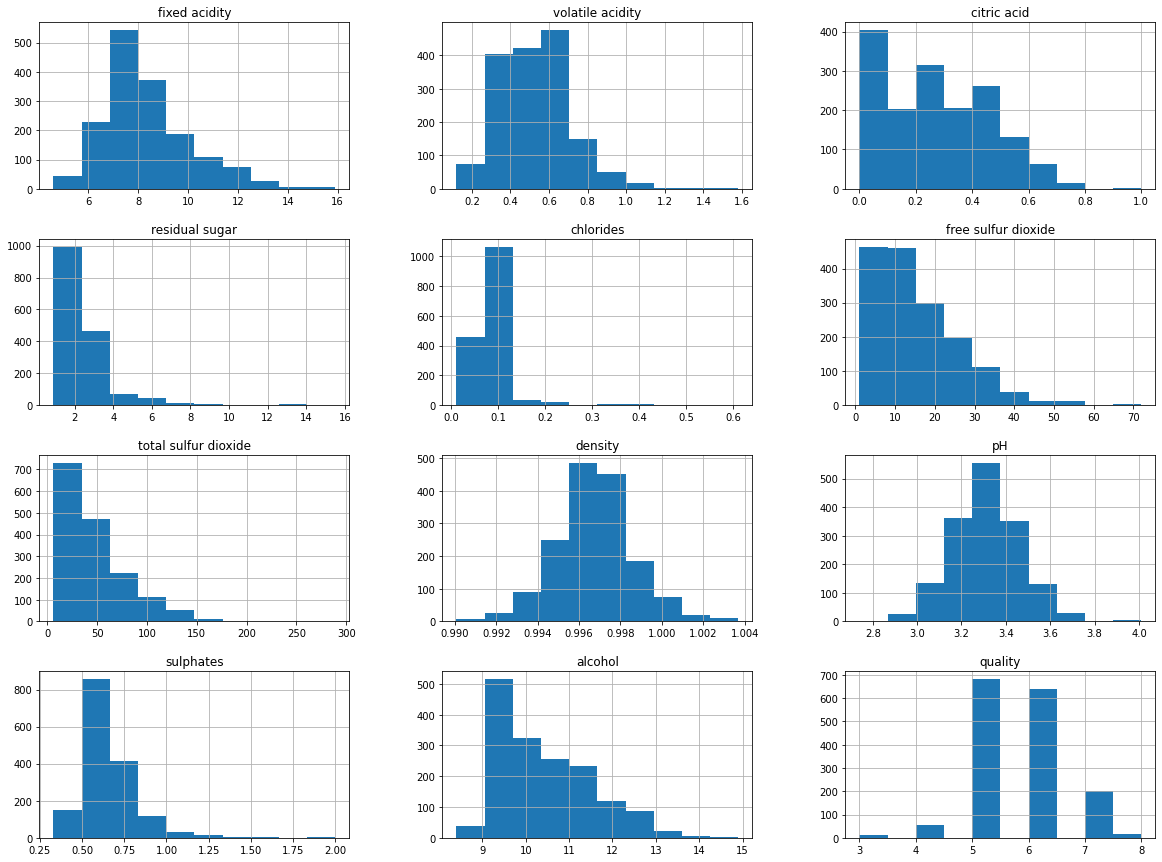

In [15]:
#Ploting the graph - Frequency Graph
frequency_graph=input_data.select_dtypes(include=['int32','int64','float'])
frequency_graph.hist(figsize=(20,15))
plt.show()

In [16]:
#From the above graph we can see Left skew,right skew and noraml skew 

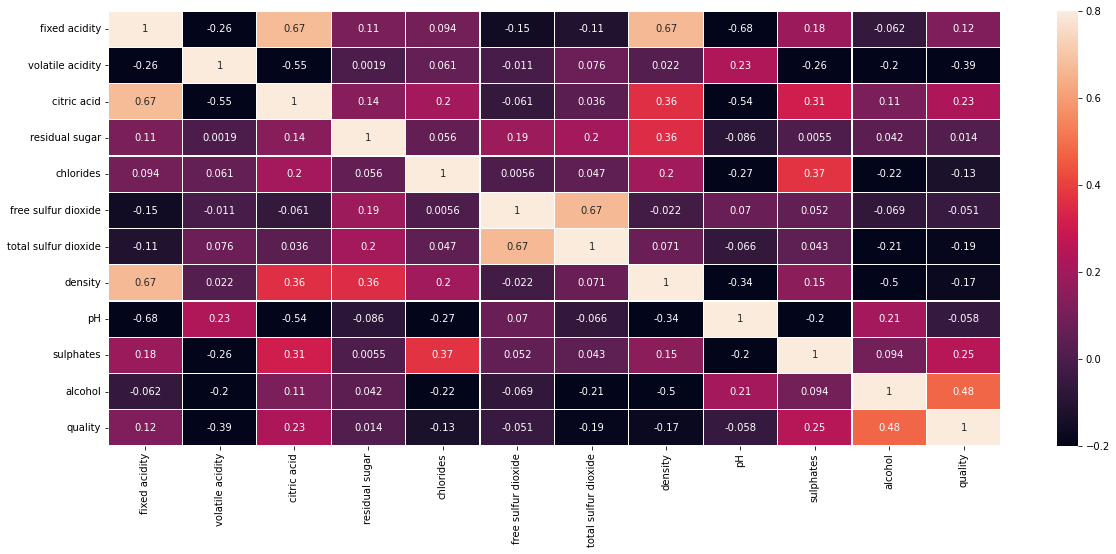

In [18]:
#Correlation matrix creation-Primary Plot
correalationmatrix=input_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(correalationmatrix,vmin=-.2,vmax=0.8,annot=True,linewidth=0.2)

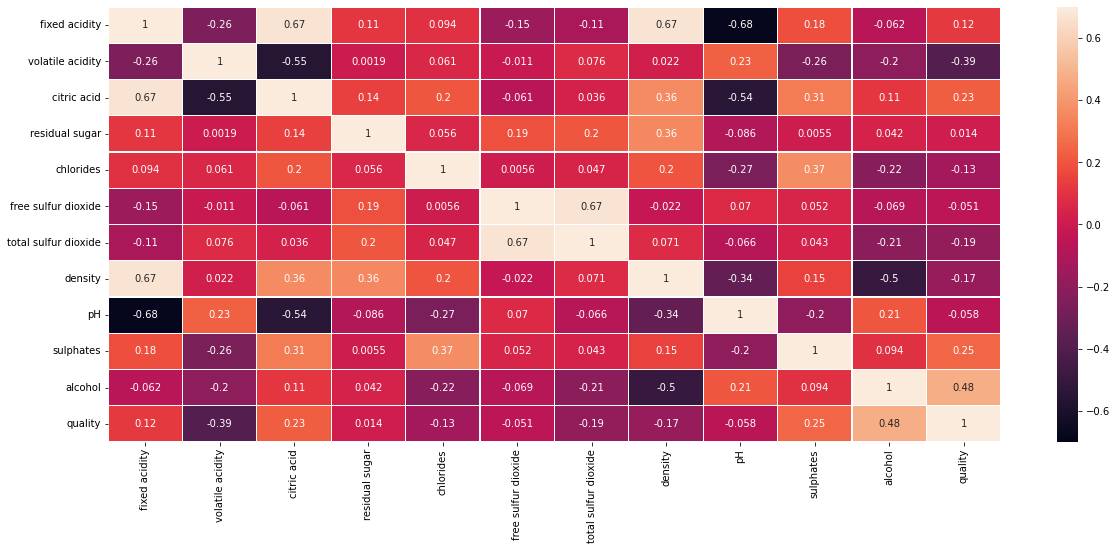

In [19]:
#Correlation matrix creation-ActualPlot
correalationmatrix=input_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(correalationmatrix,vmin=-.7,vmax=0.7,annot=True,linewidth=0.2)

In [20]:
# From the above graph fixedacid,density - fixedacid,citricacid - freesulfate,totalsulfur dioxide is highly depended

In [21]:
#Display the attributes for droping the highly related
input_data.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
drop_columns=input_data.drop(['fixed acidity','density','free sulfur dioxide'],axis=1)


In [26]:
#Checking the attributes get dropped
drop_columns.columns

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [31]:
#Taking x and y values - Input file is drop_columns
y=drop_columns['quality']
x=drop_columns.drop(['quality'],axis=1)
#shape
x.shape

(1599, 8)

In [33]:
#Test and Train data creation from the input file
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)


In [34]:
#Model creation for the LR model
from sklearn import linear_model
v_linearmodel=linear_model.LinearRegression()

In [35]:
#Fiting the model to the train data set
v_model=v_linearmodel.fit(x_train,y_train)

In [36]:
#Prediciton variable
v_predicition=v_model.predict(x_test)

In [42]:
#Display the values x_test
print(y_test)

803     6
124     5
350     6
682     5
1326    6
       ..
1565    6
327     5
254     6
322     5
1160    7
Name: quality, Length: 400, dtype: int64


In [41]:
#Display the predicition values
print(v_predicition)

[5.36573498 5.07721369 5.60698274 5.39140074 5.72969707 5.21333352
 5.09687179 5.13821023 5.75687072 5.69698188 6.1597745  5.26198819
 5.54418606 5.20924318 5.41559645 6.49914113 5.20021116 5.59170724
 6.59225973 5.31259464 5.45007367 5.18916904 5.98702503 6.42238211
 5.36569034 5.43228543 6.39936141 5.39404074 5.16299376 6.17266341
 5.28343432 5.59746345 5.78576466 5.38225279 5.45861267 5.06846554
 6.18787978 5.72387681 5.62119428 6.2126     5.49319541 5.29621209
 6.19518032 5.2264394  5.85454011 5.82197098 6.42923069 5.57184348
 5.16874304 5.586664   5.15379748 5.10317495 5.61548557 6.45194053
 5.02201755 5.06598232 6.01545709 5.49104996 5.84592793 5.26518367
 5.63978429 5.98036776 5.27944843 5.34903789 6.43413819 5.37562983
 6.3607748  5.31080635 6.49376965 5.29196656 6.45490511 4.76722094
 5.80564046 5.84684295 6.1955758  5.30011142 6.80702574 5.86425989
 6.15637682 6.48774906 5.35459331 6.46061466 5.36391195 5.73485395
 5.68839601 6.32331397 5.30570103 5.85001562 6.32379254 5.2510

In [46]:
# Checking the error value MSE
from sklearn.metrics import mean_squared_error
print('MSE:',mean_squared_error(y_test,v_predicition))

MSE: 0.3891025192103126


In [47]:
#Since value is less than .5 ie 50% the model is correct